In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [23]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [24]:
df

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [25]:
df.shape

(15, 2)

In [26]:
df.isnull().sum()

Chirps/Second         0
Ground Temperature    0
dtype: int64

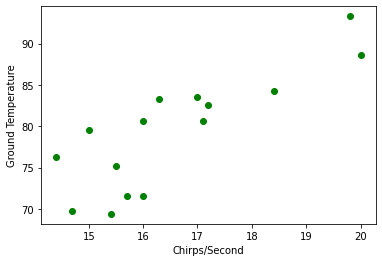

In [27]:
plt.xlabel('Chirps/Second')
plt.ylabel('Ground Temperature')
plt.scatter(x=df['Chirps/Second'],y=df['Ground Temperature'],c='green')


In [28]:
x=df.iloc[:,:-1].values
y=df.iloc[:,1].values
y

array([88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7, 71.6, 69.4, 83.3, 79.6,
       82.6, 80.6, 83.5, 76.3])

In [29]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(x)

StandardScaler()

In [30]:
regr =  linear_model.LinearRegression()
regr.fit(x,y)

LinearRegression()

In [31]:
regr.coef_

array([3.410323])

In [32]:
regr.intercept_

22.848982308066887

Find the linear regression equation for this data.

In [33]:
#y=mx+c
#x-chrips/second
#m-Coef
#c-intercept
print("Linear Regression Equation")
print(f"y = ({regr.coef_} * chirps/second) + {regr.intercept_}")



Linear Regression Equation
y = ([3.410323] * chirps/second) + 22.848982308066887


Chart the original data and the equation on the chart.

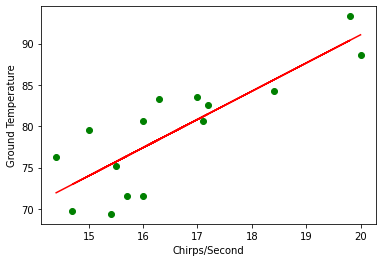

In [34]:
plt.xlabel('Chirps/Second')
plt.ylabel('Ground Temperature')
plt.scatter(x=df['Chirps/Second'],y=df['Ground Temperature'],c='green')
plt.plot(x,regr.predict(x),color='red')

In [35]:
y_pred =  regr.predict(x)
y_pred

array([91.0554423, 77.4141503, 90.3733777, 85.5989255, 81.1655056,
       75.7089888, 72.9807304, 76.3910534, 75.3679565, 78.4372472,
       74.0038273, 81.5065379, 77.4141503, 80.8244733, 71.9576335])

In [36]:
d = pd.DataFrame({'Actual':y,'Predicted':y_pred})
d

,Actual,Predicted
0,88.6,91.055442
1,71.6,77.414150
2,93.3,90.373378
3,84.3,85.598925
4,80.6,81.165506
5,75.2,75.708989
6,69.7,72.980730
7,71.6,76.391053
8,69.4,75.367957
9,83.3,78.437247


Find the equation's  R2  score

In [37]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y,y_pred))

R2- SCORE: 0.6922946529147003


Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?


In [38]:
y = df.loc[:,'Chirps/Second'].values
x= df.loc[:,['Ground Temperature']].values
x

array([[88.6],
       [71.6],
       [93.3],
       [84.3],
       [80.6],
       [75.2],
       [69.7],
       [71.6],
       [69.4],
       [83.3],
       [79.6],
       [82.6],
       [80.6],
       [83.5],
       [76.3]])

In [39]:
Eregr =  linear_model.LinearRegression()
Eregr.fit(x,y)

LinearRegression()

In [40]:
temp=95
print("Rate of chirping/second",Eregr.predict([[temp]]))

Rate of chirping/second [19.74428913]


Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?

In [41]:
Chirps = 18
print("Approximate ground temperature",regr.predict([[Chirps]]))

Approximate ground temperature [84.2347963]


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [42]:
df = pd.read_fwf("brain_body.txt")

In [43]:
df

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [44]:
df.shape

(62, 2)

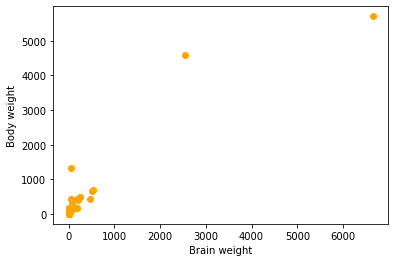

In [45]:
plt.xlabel('Brain weight')
plt.ylabel('Body weight')
plt.scatter(df['Brain'],df['Body'],color='orange')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


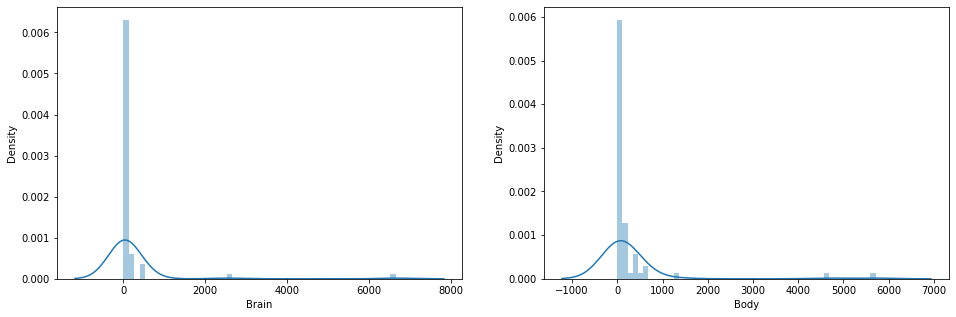

In [46]:
import seaborn as sns
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Brain'])
plt.subplot(1,2,2)
sns.distplot(df['Body'])
plt.show()

In [47]:
# Outlier in Brain weight column
Q1 = np.percentile(df['Brain'], 25,interpolation = 'midpoint')
 
Q3 = np.percentile(df['Brain'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
new_df = df.copy()
new_df['Brain'] = np.where(new_df['Brain'] > upper_limit,upper_limit,np.where(new_df['Brain'] < lower_limit,lower_limit,new_df['Brain']))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

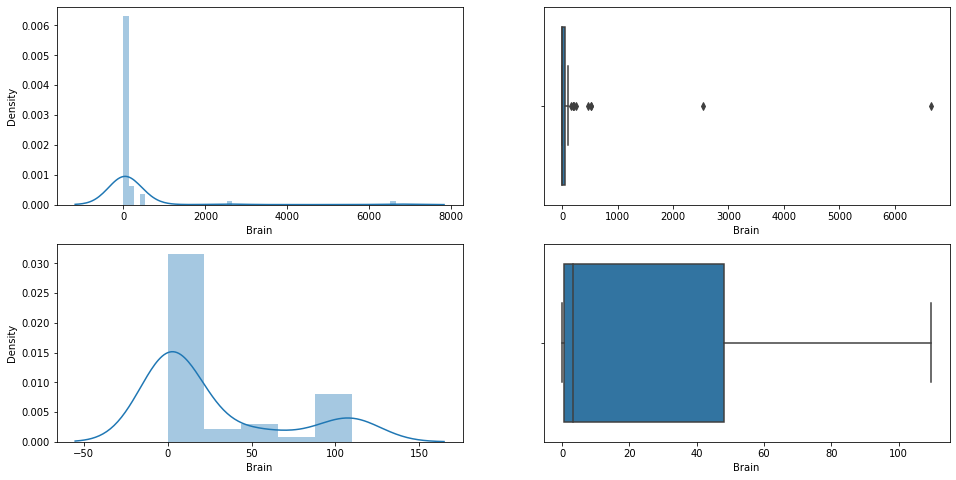

In [48]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Brain'])
plt.subplot(2,2,2)
sns.boxplot(df['Brain'])
plt.subplot(2,2,3)
sns.distplot(new_df['Brain'])
plt.subplot(2,2,4)
sns.boxplot(new_df['Brain'])
plt.show()

In [49]:
# Outlier in Body weight column
Q1 = np.percentile(df['Body'], 25,interpolation = 'midpoint')
 
Q3 = np.percentile(df['Body'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
new_df = df.copy()
new_df['Body'] = np.where(new_df['Body'] > upper_limit,upper_limit,np.where(new_df['Body'] < lower_limit,lower_limit,new_df['Body']))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

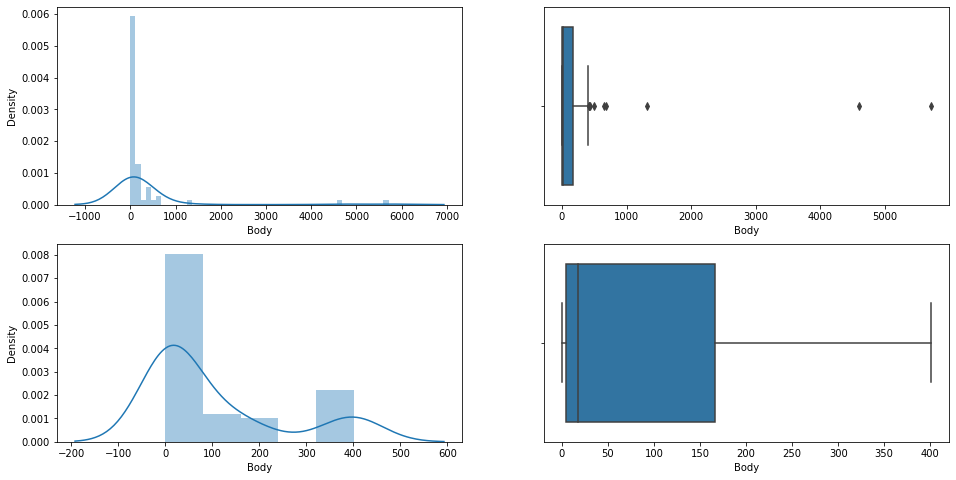

In [50]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Body'])
plt.subplot(2,2,2)
sns.boxplot(df['Body'])
plt.subplot(2,2,3)
sns.distplot(new_df['Body'])
plt.subplot(2,2,4)
sns.boxplot(new_df['Body'])
plt.show()

In [51]:
df.isnull().sum()

Brain    0
Body     0
dtype: int64

In [52]:
new_df.corr()

,Brain,Body
Brain,1.000000,0.431722
Body,0.431722,1.000000


In [53]:
x=new_df.iloc[:,:-1].values
y=new_df.iloc[:,1].values


In [54]:
regr =  linear_model.LinearRegression()
regr.fit(x,y)

LinearRegression()

In [55]:
regr.coef_

array([0.07014368])

In [56]:
regr.intercept_

89.5048483930462

In [57]:
y_pred =  regr.predict(x)
y_pred

array([ 89.74228475,  89.53851736,  89.59954236, 122.12166022,
        92.05316834,  91.44502262,  90.54507919,  89.57779782,
        89.79875042,  89.53465946,  89.5119329 ,  89.56938058,
        89.57499207,  89.50519911,  89.50905701,  89.75035128,
        89.64513576,  89.62409265, 268.16080479,  89.5064617 ,
       102.62873117, 126.04970638,  89.55991118,  90.20628521,
        89.73632254,  89.51887713,  89.60375098, 126.61085583,
       104.02459043,  95.46706131,  89.55745615,  93.85375664,
       556.2409041 ,  89.75035128,  89.98182543,  91.95987724,
        89.7889303 ,  89.51326563,  89.5064617 ,  89.50554983,
        89.60304955, 107.04076873,  89.6802076 ,  93.39782271,
        96.51921653,  93.16354281,  90.24486423,  89.54342742,
        93.71346927,  89.75736565,  89.8056245 ,  89.52448862,
        89.51010917,  89.51340592,  89.50821529, 102.97243521,
        89.71527944, 100.72783741,  89.56797771,  89.61848116,
        89.51214334,  89.80190688])

In [58]:
d = pd.DataFrame({'Actual':y,'Predicted':y_pred})
d


,Actual,Predicted
0,44.50,89.742285
1,15.50,89.538517
2,8.10,89.599542
3,400.75,122.121660
4,119.50,92.053168
...,...,...
57,169.00,100.727837
58,2.60,89.567978
59,11.40,89.618481
60,2.50,89.512143


Find the linear regression equation for this data for brain weight to body weight.


In [59]:
#y=mx+c
#x-chrips/second
#m-Coef
#c-intercept
print("Linear Regression Equation")
print(f"y = ({regr.coef_} * Brain weight) + {regr.intercept_}")


Linear Regression Equation
y = ([0.07014368] * Brain weight) + 89.5048483930462


Chart the original data and the equation on the chart.


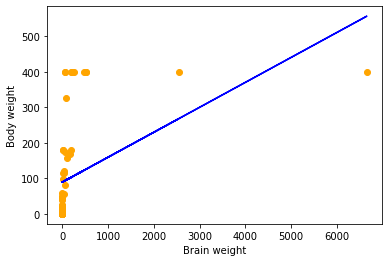

In [60]:
plt.xlabel('Brain weight')
plt.ylabel('Body weight')
plt.scatter(x=new_df['Brain'],y=new_df['Body'],c='orange')
plt.plot(x,regr.predict(x),color='blue')



Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [61]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y,y_pred))

R2- SCORE: 0.18638345621523322


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [62]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [63]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [64]:
df.shape

(52, 6)

In [65]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [66]:
x =df.iloc[:,:5]
y=df.iloc[:,5]
y

0     36350
1     35350
2     28200
3     26775
4     33696
5     28516
6     24900
7     31909
8     31850
9     32850
10    27025
11    24750
12    28200
13    23712
14    25748
15    29342
16    31114
17    24742
18    22906
19    24450
20    19175
21    20525
22    27959
23    38045
24    24832
25    25400
26    24800
27    25500
28    26182
29    23725
30    21600
31    23300
32    23713
33    20690
34    22450
35    20850
36    18304
37    17095
38    16700
39    17600
40    18075
41    18000
42    20999
43    17250
44    16500
45    16094
46    16150
47    15350
48    16244
49    16686
50    15000
51    20300
Name: Salary, dtype: int64

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [68]:
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (36, 5)
X_test: (16, 5)
Y_train: (36,)
Y_test: (16,)


In [69]:
linreg=LinearRegression()
linreg.fit(x_train,y_train)


LinearRegression()

In [70]:
y_pred=linreg.predict(x_test)
y_pred

array([20987.9418477 , 16820.32286055, 26612.05025168, 22696.29356474,
       29405.09526139, 19864.29644059, 16353.48829306, 18191.06070714,
       24958.65320826, 32771.53611383, 30381.55264166, 28432.47401197,
       23695.70050029, 20560.05939466, 20122.99068304, 17645.46594964])

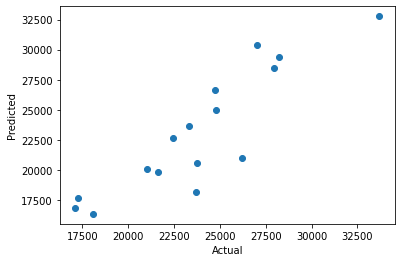

In [71]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

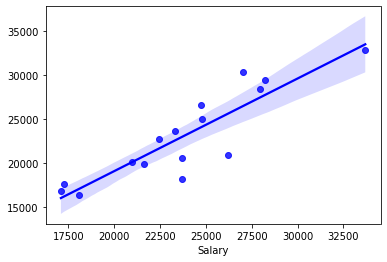

In [72]:
import seaborn as sns
sns.regplot(x=y_test,y=y_pred,color ='blue');

In [73]:
d=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred})
d

,Actual Value,Predicted Value
28,26182,20987.941848
37,17095,16820.322861
11,24750,26612.050252
34,22450,22696.293565
2,28200,29405.095261
30,21600,19864.296441
40,18075,16353.488293
32,23713,18191.060707
26,24800,24958.653208
4,33696,32771.536114


In [74]:
# selection of columns
df.columns

Index(['Sex', 'Rank', 'Year', 'Degree', 'YSdeg', 'Salary'], dtype='object')

In [75]:
a =df.iloc[:,:4]
b=df.iloc[:,5]


In [76]:
x_train,x_test,y_train,y_test=train_test_split(a,b,test_size=0.2,random_state=0)

In [77]:
linreg=LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [78]:
y_pred=linreg.predict(x_test)

Report whether sex is a factor in salary

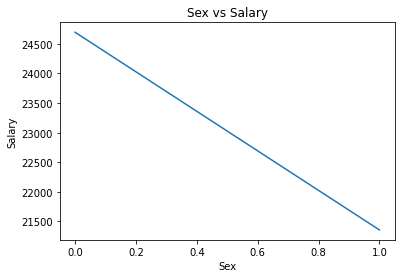

In [82]:
df.groupby('Sex')['Salary'].mean().plot()
plt.title("Sex vs Salary")
plt.xlabel("Sex")
plt.ylabel("Salary")
plt.show()



*  Sex is not an important factor in determining salary


